### Notebook to train the background Kernel Density Estimates for Bayesian inference 

In [51]:
%matplotlib inline
from sklearn.neighbors.kde import KernelDensity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

import pickle as p

In [3]:
#read in the combined photometric data:
catalog = pd.read_csv('n4473_phot_combined.csv')

### Apply some appropriate cuts to the data to select out only point sources 

In [98]:
#only use data selcted with all three filters with no flags
all_detected = (catalog['g_mag'] < 90) & (catalog['r_mag'] < 90) & (catalog['i_mag'] < 90)# & \
    #(catalog['g_flags'] < 1) & (catalog['r_flags'] < 1) & (catalog['i_flags'] < 1)

all_detections = catalog.ix[all_detected,:]


In [99]:
#also need to correct for FG extinction. Take values from NASA NED:
fg_g = 0.093
fg_r = 0.064
fg_i = 0.048

all_detections ['g_mag'] = all_detections['g_mag'] - fg_g
all_detections ['r_mag'] = all_detections['r_mag'] - fg_r
all_detections ['i_mag'] = all_detections['i_mag'] - fg_i

/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [100]:
#now, cut what we think are extended sources from this catalog using the filter with the best seeing
fwhm_max = 3.5
fwhm_min = 2.5

size_1 = all_detections.ix[(all_detections['i_fwhm'] < 3.4) & (all_detections['i_mag'] < 25) & \
                           (all_detections['i_mag'] > 17.5) & (all_detections['i_fwhm'] > 3) & \
                           ((all_detections['g_mag'] - all_detections['i_mag']) < 1.5) & \
                           ((all_detections['g_mag'] - all_detections['i_mag']) > 0.0) & \
                           ((all_detections['r_mag'] - all_detections['i_mag']) < 1.0) & \
                           ((all_detections['r_mag'] - all_detections['i_mag']) > -0.5),:]
                           #(all_detections['g_fwhm'] < 5.0),:]
                          # (all_detections['r_fwhm'] < 4.5) & \
                          # (all_detections['g_fwhm'] < 5.0),:]


size_2 = all_detections.ix[(all_detections['i_fwhm'] > 2.5) & (all_detections['i_fwhm'] < 3.0),:]
size_3 = all_detections.ix[(all_detections['i_fwhm'] > 3.0) & (all_detections['i_fwhm'] < 3.5),:]
size_4 = all_detections.ix[(all_detections['i_fwhm'] > 3.5) & (all_detections['i_fwhm'] < 4.),:]
size_5 = all_detections.ix[(all_detections['i_fwhm'] > 4.) & (all_detections['i_fwhm'] < 4.5),:]
size_6 = all_detections.ix[(all_detections['i_fwhm'] > 4.5),:]



(2, 6)

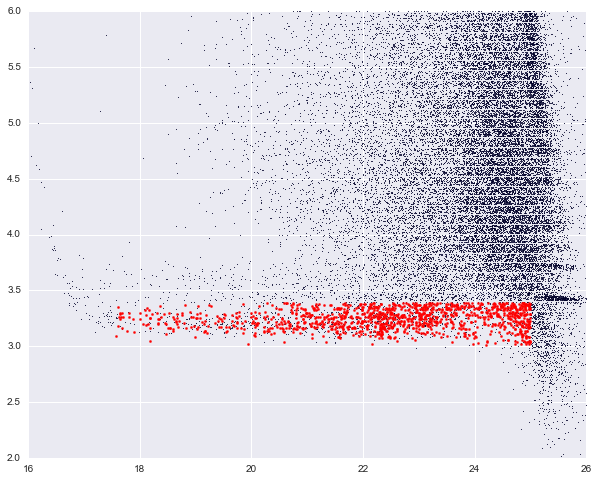

In [101]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(all_detections['i_mag'],all_detections['i_fwhm'],s=0.5)
ax.scatter(size_1['i_mag'],size_1['i_fwhm'],s=5,color='red')
ax.set_xlim(16,26)
ax.set_ylim(2,6)

(-0.3, 0.8)

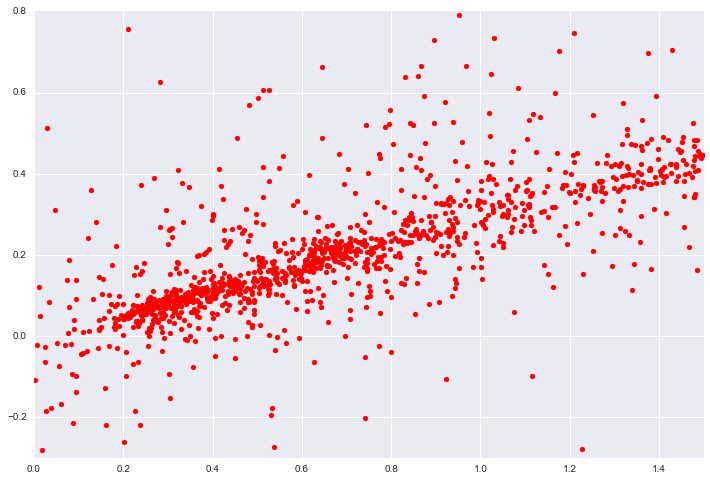

In [105]:
fig,ax = plt.subplots(figsize=(12,8))


#ax.scatter(all_detections['g_mag'] - all_detections['i_mag'],\
#            all_detections['r_mag'] - all_detections['i_mag'],s=1.5)
'''
ax.scatter(size_5['g_mag'] - size_5['i_mag'],\
            size_5['r_mag'] - size_5['i_mag'],s=1.5,color='blue')
ax.scatter(size_4['g_mag'] - size_4['i_mag'],\
            size_4['r_mag'] - size_4['i_mag'],s=1.5,color='green')
ax.scatter(size_3['g_mag'] - size_3['i_mag'],\
            size_3['r_mag'] - size_3['i_mag'],s=1.5,color='yellow')
'''
#ax.scatter(size_2['g_mag'] - size_2['i_mag'],\
#            size_2['r_mag'] - size_2['i_mag'],s=1.5,color='red')
ax.scatter(size_1['g_mag'] - size_1['i_mag'],\
            size_1['r_mag'] - size_1['i_mag'],s=25,color='red')

ax.set_xlim(-0.0,1.5)
ax.set_ylim(-0.3,0.8)

(-0.5, 2)

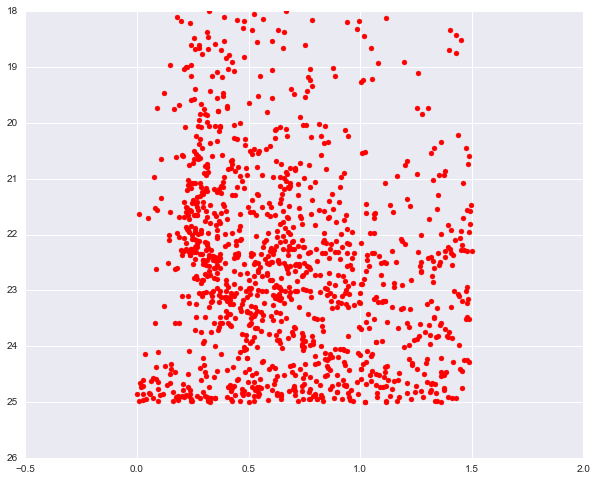

In [106]:
fig,ax = plt.subplots(figsize=(10,8))
#ax.scatter(all_detections['g_mag'] - all_detections['i_mag'],all_detections['i_mag'],s=0.5)
ax.scatter(size_1['g_mag'] - size_1['i_mag'],size_1['i_mag'],s=25,color='red')
ax.set_ylim(26,18)
ax.set_xlim(-0.5,2)

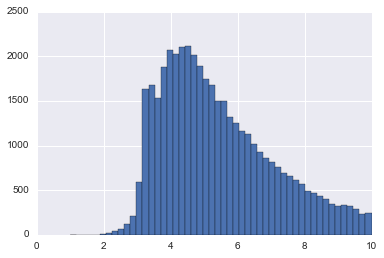

In [107]:
hist = plt.hist(all_detections['i_fwhm'],bins=50,range=(1,10))

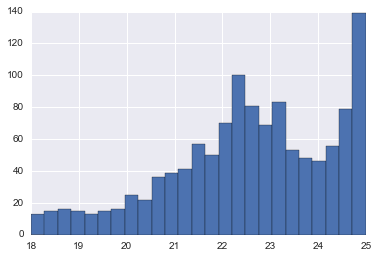

In [108]:
hist = plt.hist(size_1['i_mag'],bins=25,range=(18,25))

In [109]:
extended = (all_detections['i_fwhm'] > fwhm_max)
extended_sources = all_detections.ix[extended,:]

(-0.5, 1.0)

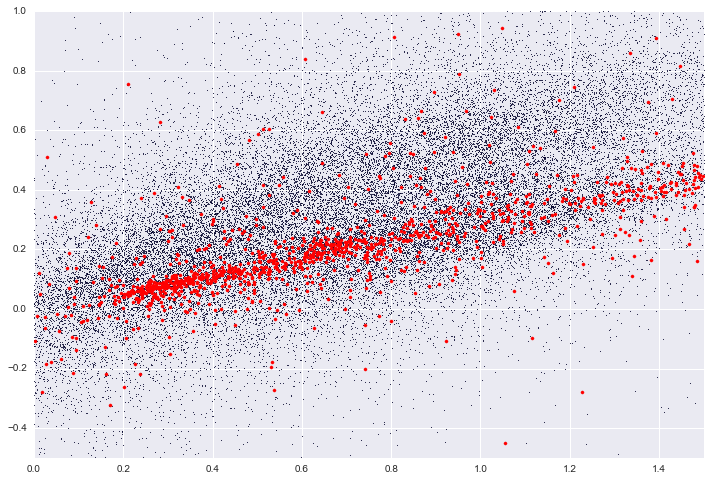

In [110]:
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(all_detections['g_mag'] - all_detections['i_mag'],\
            all_detections['r_mag'] - all_detections['i_mag'],s=0.5)

ax.scatter(size_1['g_mag'] - size_1['i_mag'],\
            size_1['r_mag'] - size_1['i_mag'],s=10,color='red')

#ax.scatter(extended_sources['g_mag'] - extended_sources['i_mag'],\
#            extended_sources['r_mag'] - extended_sources['i_mag'],s=2.0,color='red')

#ax.scatter(sized_data['g_mag'] - sized_data['i_mag'],\
#            sized_data['r_mag'] - sized_data['i_mag'],s=2.0,color='green')
ax.set_xlim(0.,1.5)
ax.set_ylim(-0.5,1.0)

(array([  16.,   15.,   23.,   19.,   18.,   22.,   27.,   30.,   47.,
          59.,   72.,   69.,  119.,  105.,  105.,   81.,   70.,   60.,
          87.,  170.]),
 array([ 17.5736 ,  17.94484,  18.31608,  18.68732,  19.05856,  19.4298 ,
         19.80104,  20.17228,  20.54352,  20.91476,  21.286  ,  21.65724,
         22.02848,  22.39972,  22.77096,  23.1422 ,  23.51344,  23.88468,
         24.25592,  24.62716,  24.9984 ]),
 <a list of 20 Patch objects>)

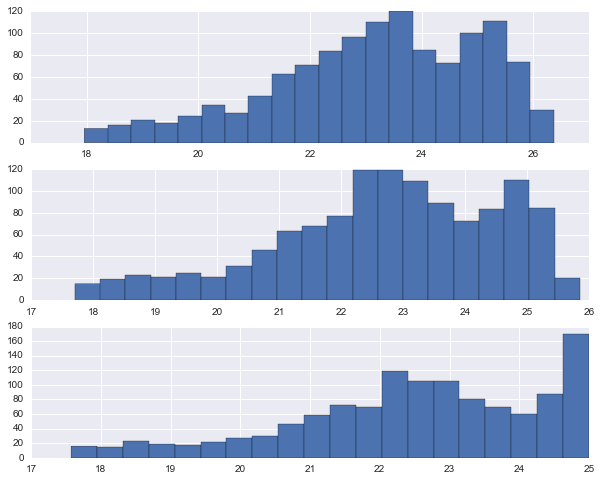

In [111]:
fig,ax = plt.subplots(3,1,figsize=(10,8))
bins=20
ax[0].hist(size_1['g_mag'],bins=bins)
ax[1].hist(size_1['r_mag'],bins=bins)
ax[2].hist(size_1['i_mag'],bins=bins)

In [221]:
gi = size_1['g_mag'] - size_1['i_mag']
ri = size_1['r_mag'] - size_1['i_mag']

In [222]:
#train a 2D kernel density estimate
kd = p.load(open('../ngvs_bg_3/ngvs_bg_3_trimmed_kde.p','rb'),encoding='latin1')

In [223]:
X, Y = np.meshgrid(np.arange(0,1.5,0.01),np.arange(-0.5,1.0,0.01))
xy = np.vstack([X.ravel(), Y.ravel()]).T

scores=np.exp(kd.score_samples(xy))
Z = scores.reshape(X.shape)
levels = np.linspace(0, Z.max(), 25)

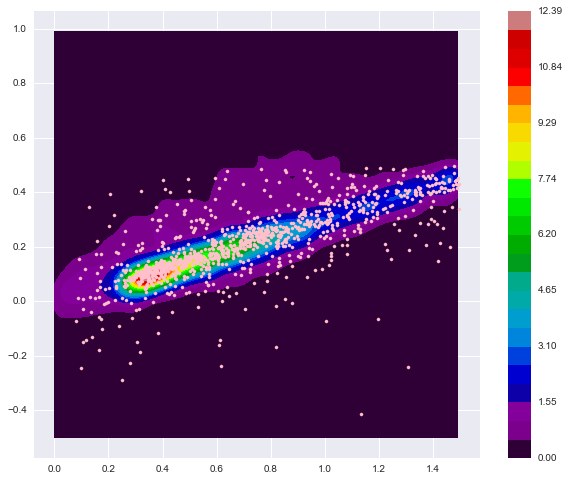

In [224]:
fig,ax = plt.subplots(figsize=(10,8))
contour = ax.contourf(X, Y, Z, levels=levels, cmap=plt.cm.spectral)
ax.scatter(size_1['g_mag'][g] - size_1['i_mag'][g] + 0.08,\
            size_1['r_mag'][g] - size_1['i_mag'][g] + 0.035,s=10,color='pink')
plt.colorbar(contour)

#plt.scatter(n3115_good['g_mag'] - n3115_good['i_mag'],n3115_good['r_mag'] - n3115_good['i_mag']+0.04,s=10,color='blue')

## Bayesian GC Population Inference 

In [225]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
#import fakeGalaxy
#reload(fakeGalaxy)
import numpy as np
import seWrapper
import gcSampler
import densityGC
import densityFG
import subprocess as sp
import SourceCompleteness
import corner
import pickle
import truncMVN
from importlib import reload

reload(seWrapper)
reload(gcSampler)
reload(densityGC)
reload(densityFG)
reload(SourceCompleteness)
reload(truncMVN.truncMVN)
import emcee

In [226]:
c_ra = 187.4536277
c_dec = 13.4293595
distance = np.sqrt((size_1['ra'] - c_ra)**2 + (size_1['dec']-c_dec)**2)
#fwhm = data['fwhm_world']

In [227]:
gi = size_1['g_mag'] - size_1['i_mag']
ri = size_1['r_mag'] - size_1['i_mag']

gi_off = 0.08
ri_off = 0.035
g = (gi + gi_off > 0.0) & (gi + gi_off < 1.5) & \
    (ri + ri_off > -0.5) & (ri + ri_off < 0.5) & (distance < 0.3)
gi = gi + gi_off
ri = ri + ri_off

In [228]:
good_colors = np.array([gi[g],ri[g]])
good_coords = np.vstack([size_1['ra'][g],size_1['dec'][g]])
good_lum = size_1['i_mag'][g]

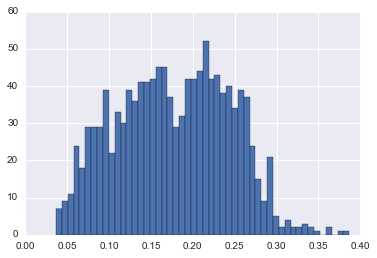

In [229]:
hist = plt.hist(distance,bins=50)

In [230]:
c_blue = np.array([-0.0,-0.5])
c_red = np.array([1.5,0.5])

In [231]:
print(good_coords.shape)
print(good_lum.shape)

(2, 1095)
(1095,)


In [232]:
cat = (good_colors.T,good_lum,good_coords)

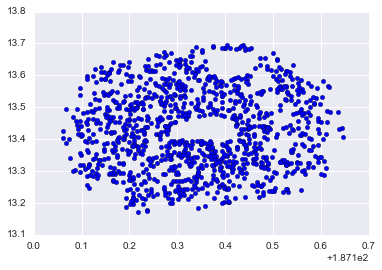

In [233]:
plt.scatter(good_coords[0,:],good_coords[1,:])

In [240]:
reload(gcSampler)
reload(densityGC)
reload(densityFG)

gc_n3115 = gcSampler.gcSampler(100.,catalog=cat,\
                fractions=np.array([0.25,0.25,0.5]),center=[c_ra,c_dec],spatial=np.array([0.1,1.0,0.0]),\
                  max_rad=0.3,radial_profile=None,mock=False,n_source=1000,ellipticity=False,\
                         n_pop=2,fixed_cov=False,fixed_means=False,fixed_lum=True,lum_function=None,
                         completeness=None,fg_faint=24.,incomplete=False,fg_kde_file='../ngvs_bg_2/ngvs_bg_2_trimmed_kde.p',
                         fg_bright=18.,lum_mean=np.array([23.]),lum_sig=np.array([1.5]),\
                               gi_offset=0.0,ri_offset=ri_off,c_blue=c_blue,c_red=c_red,re_norm=True,gi_divide=0.75)

In [241]:
gc_n3115.runSampler(3000.,burn_steps=0.)

/Users/zjennings/google_drive_personal/gc_select/gcSampler.py:703: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.chain=self.sampler.chain[:,burn_steps:,:]
/Users/zjennings/google_drive_personal/gc_select/gcSampler.py:724: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  flat_chain = self.chain[:,n_burn:,:].reshape(-1,self.n_dim)


/Users/zjennings/anaconda/envs/astro/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


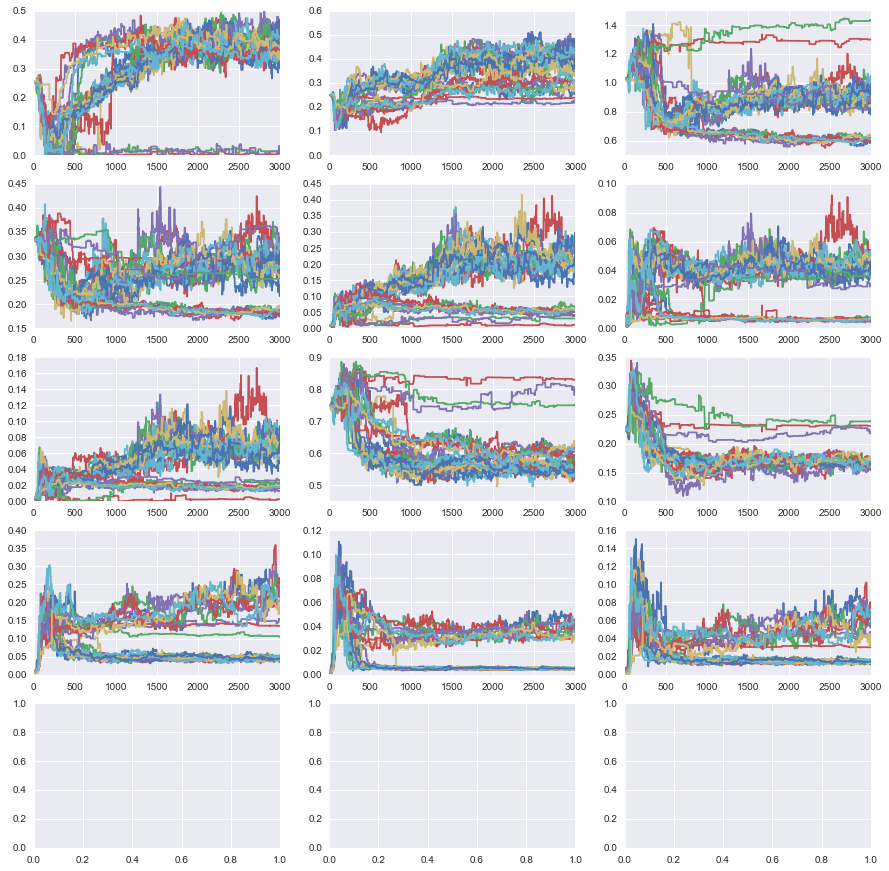

In [242]:
fig,ax = plt.subplots(figsize=(15,15),ncols=3,nrows=5,dpi=1000)

for i in range(gc_n3115.n_dim):
    for j in range(30):
        ax[i/3,i%3].plot(gc_n3115.sampler.chain[j,:,i])